# Task 1: K-Means Clustering for Customer Segmentation

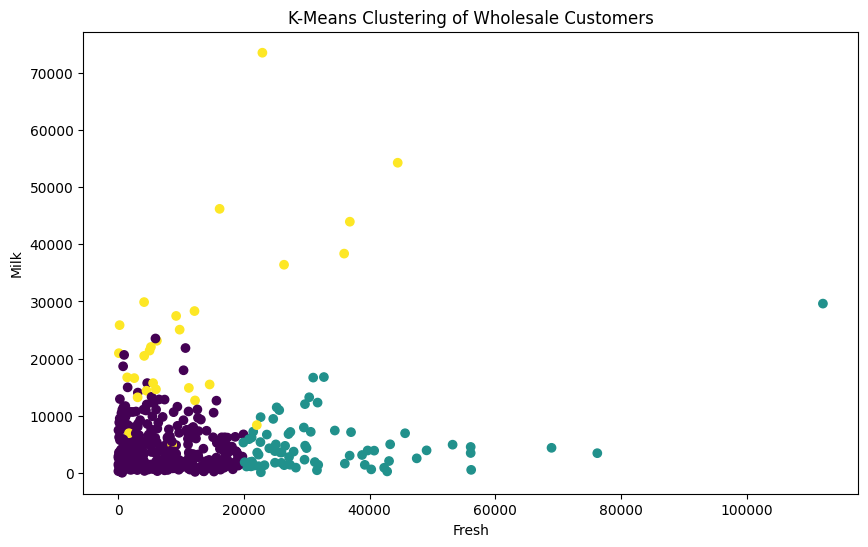

In [1]:
# Task 1: K-Means Clustering for Customer Segmentation

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('Wholesale customers data.csv')

# Select features
X = data.drop(columns=['Channel', 'Region'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('K-Means Clustering of Wholesale Customers')
plt.show()


# Task 2: Evaluating the Optimal Number of Clusters

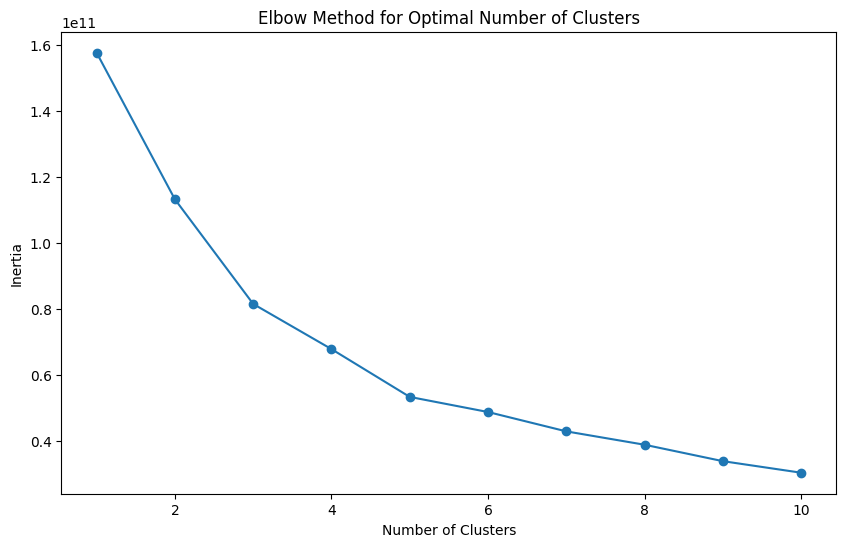

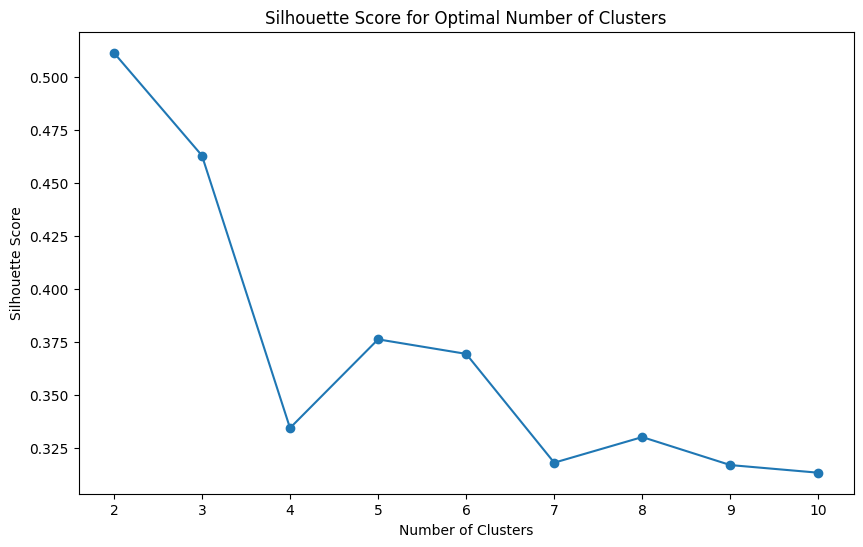

In [2]:
# Task 2: Evaluating the Optimal Number of Clusters

from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Silhouette Score
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()


# Task 3: Cluster Analysis and Interpretation

In [3]:
# Task 3: Cluster Analysis and Interpretation

# Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Describe clusters
for cluster in range(3):
    print(f"\nCluster {cluster} Profile:")
    print(data[data['Cluster'] == cluster].describe())


Cluster Centers:
[[ 4443.22988506  8716.5862069  12616.68965517  1456.17241379
   5391.33333333  1512.42528736]
 [26442.36585366  5742.6097561   7438.75609756  4762.04878049
   1495.58536585  2359.09756098]
 [26272.5        35951.25       68811.75        3048.25
  32450.25        3160.25      ]
 [44408.10526316  3175.36842105  4057.47368421  4617.31578947
    757.          2159.05263158]
 [22925.         73498.         32114.           987.
  20070.           903.        ]
 [ 4850.65359477  2529.48366013  3074.4248366   2552.70588235
    828.58823529   840.76470588]
 [ 6683.06666667 17468.03333333 26658.93333333  1986.3
  11872.9         2531.2       ]
 [34782.         30367.         16898.         48701.5
    755.5        26776.        ]
 [15681.19        2696.35        3696.58        3392.79
    822.89        1180.74      ]
 [85779.66666667 12503.66666667 12619.66666667 13991.66666667
   2159.          3958.        ]]

Cluster 0 Profile:
          Channel      Region         Fresh   

# Task 4: Hierarchical Clustering: Dendrogram and Cluster Formation

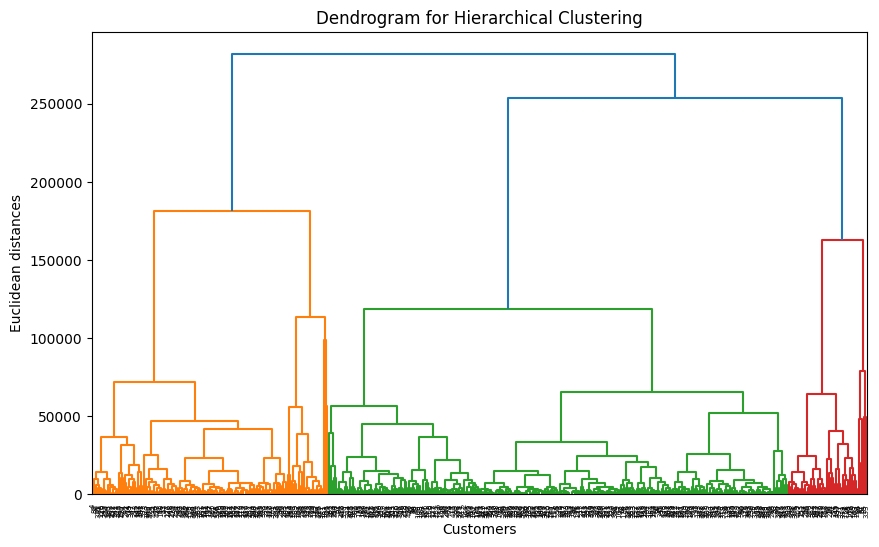

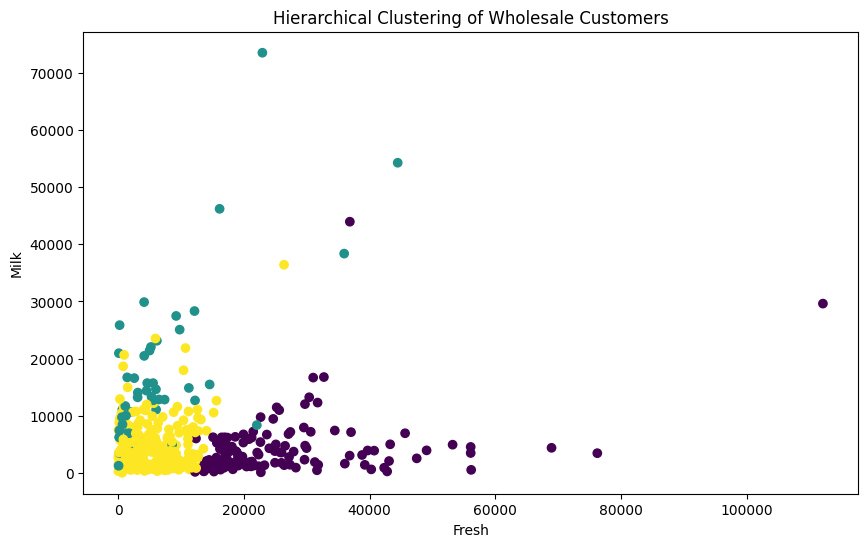

In [5]:
# Task 4: Hierarchical Clustering: Dendrogram and Cluster Formation

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['HC_Cluster'] = hc.fit_predict(X)

# Compare with K-Means
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['HC_Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Hierarchical Clustering of Wholesale Customers')
plt.show()


# Task 5: Comparison of Clustering Results

Silhouette Score for K-Means: 0.46302676343469656
Silhouette Score for Hierarchical Clustering: 0.37501552145375117


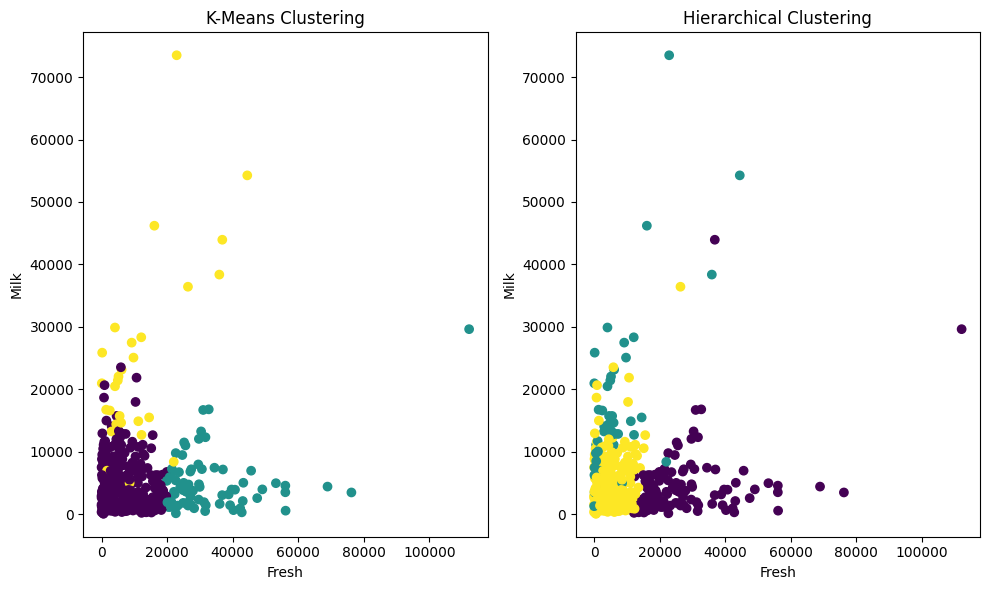

In [6]:
# Task 5: Comparison of Clustering Results

# Calculate Silhouette Scores for comparison
kmeans_silhouette = silhouette_score(X, data['Cluster'])
hc_silhouette = silhouette_score(X, data['HC_Cluster'])

print(f'Silhouette Score for K-Means: {kmeans_silhouette}')
print(f'Silhouette Score for Hierarchical Clustering: {hc_silhouette}')

# Visualization
plt.figure(figsize=(10, 6))

# K-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('K-Means Clustering')

# Hierarchical Clusters
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['HC_Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Hierarchical Clustering')

plt.tight_layout()
plt.show()
